In [1]:
%pip install diffusers
%pip install transformers
%pip install torch
%pip install accelerate

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 342.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from diffusers import StableDiffusionXLInpaintPipeline
from diffusers.utils import load_image, make_image_grid
import torch

/home/rajko/miniconda/envs/huggingfacedemo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device  = "cpu"
if(torch.cuda.is_available()):
    device = "cuda"

if(torch.backends.mps.is_available()):
    device = "mps"

print("Selected device: ", device)

Selected device:  cuda


In [3]:
base = StableDiffusionXLInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]


In [4]:
refiner = StableDiffusionXLInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to(device)

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]





scheduler/scheduler_config.json: 100%|██████████| 479/479 [00:00<00:00, 85.4kB/s]







tokenizer_2/special_tokens_map.json: 100%|██████████| 460/460 [00:00<00:00, 39.0kB/s]



unet/config.json: 100%|██████████| 1.71k/1.71k [00:00<00:00, 489kB/s]



tokenizer_2/tokenizer_config.json: 100%|██████████| 725/725 [00:00<00:00, 214kB/s]




tokenizer_2/merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 1.00MB/s]
Fetching 9 files:  33%|███▎      | 3/9 [00:00<00:02,  2.97it/s]


tokenizer_2/vocab.json: 100%|██████████| 1.06M/1.06M [00:00<00:00, 1.34MB/s]
Fetching 9 files:  67%|██████▋   | 6/9 [00:01<00:00,  5.81it/s]














diffusion_pytorch_model.fp16.safetensors: 100%|██████████| 167M/167M [00:08<00:00, 19.9MB/s]
diffusion_pytorch_model.fp16.safetensors: 100%|██████████| 4.52G/4.52G [02:23<00:00, 31.6MB/s]
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 19.81it/s]


In [6]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"
init_image = load_image(img_url)
mask_image = load_image(mask_url)

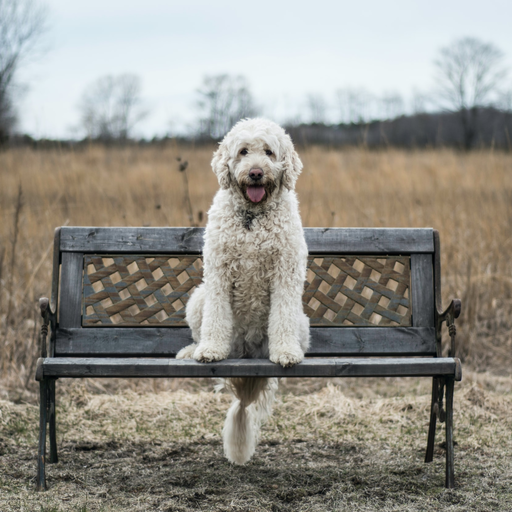

In [7]:
init_image

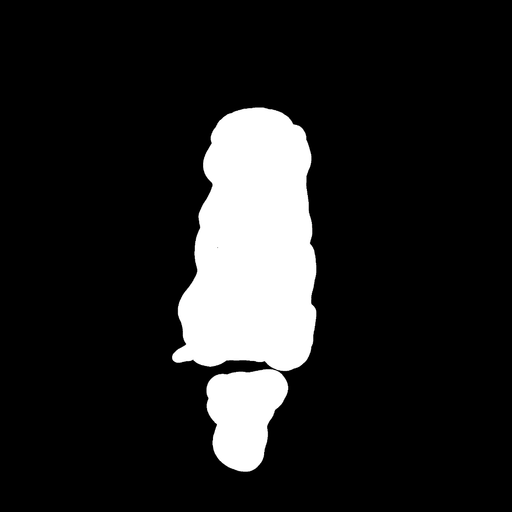

In [8]:
mask_image

In [9]:
prompt = "A majestic tiger sitting on a bench"
num_inference_steps = 75
high_noise_frac = 0.7

100%|██████████| 23/23 [04:18<00:00, 11.23s/it]


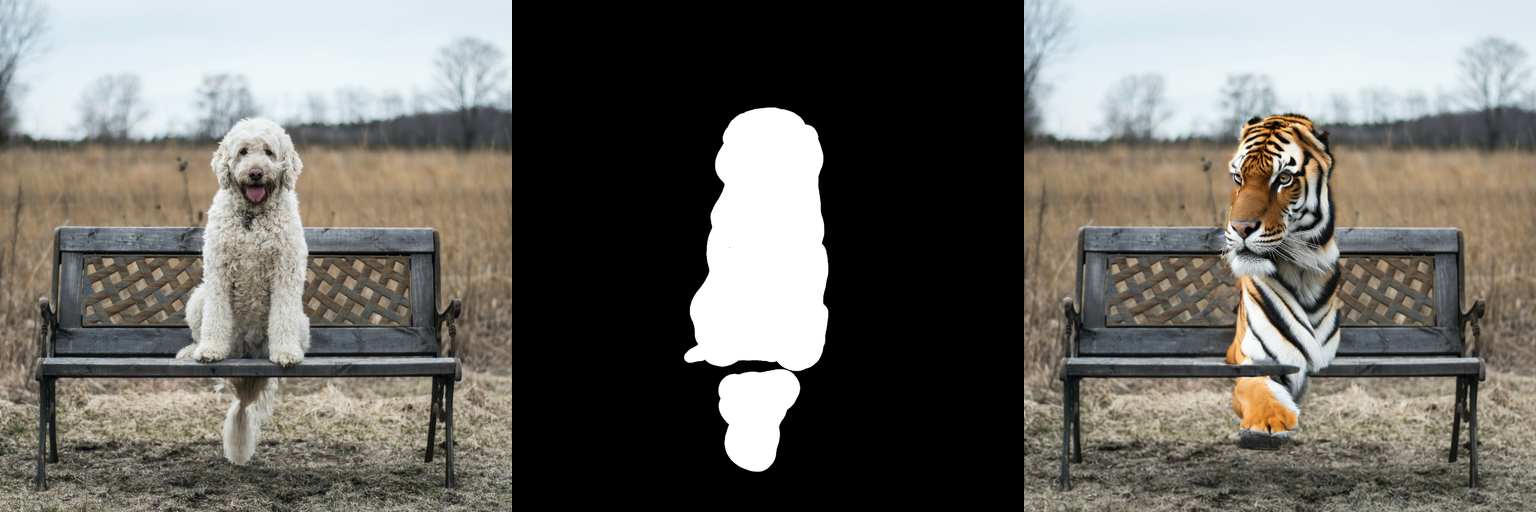

In [10]:
image = base(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=num_inference_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    num_inference_steps=num_inference_steps,
    denoising_start=high_noise_frac,
).images[0]
make_image_grid([init_image, mask_image, image.resize((512, 512))], rows=1, cols=3)